In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from collections import Counter

In [2]:
# Kaggle link: https://www.kaggle.com/datasets/ahsan81/job-placement-dataset

data = pd.read_csv("job_data.csv")
data

,gender,ssc_percentage,ssc_board,hsc_percentage,hsc_board,hsc_subject,degree_percentage,undergrad_degree,work_experience,emp_test_percentage,specialisation,mba_percent,status
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed
211,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed
212,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed
213,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed


# Data Exploration and Visualizations

In [3]:
data.nunique()

gender                   2
ssc_percentage         103
ssc_board                2
hsc_percentage          97
hsc_board                2
hsc_subject              3
degree_percentage       89
undergrad_degree         3
work_experience          2
emp_test_percentage    100
specialisation           2
mba_percent            205
status                   2
dtype: int64

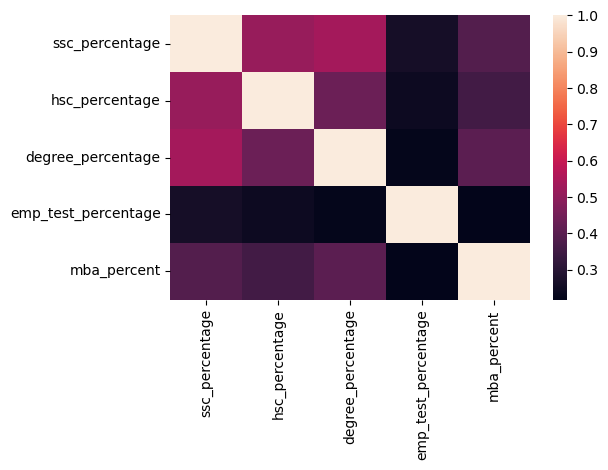

In [10]:
# Correlation matrix

corr_matrix = sns.heatmap(data.corr())
plt.tight_layout()

cm_fig = corr_matrix.get_figure()
cm_fig.savefig("viz/cm.png")

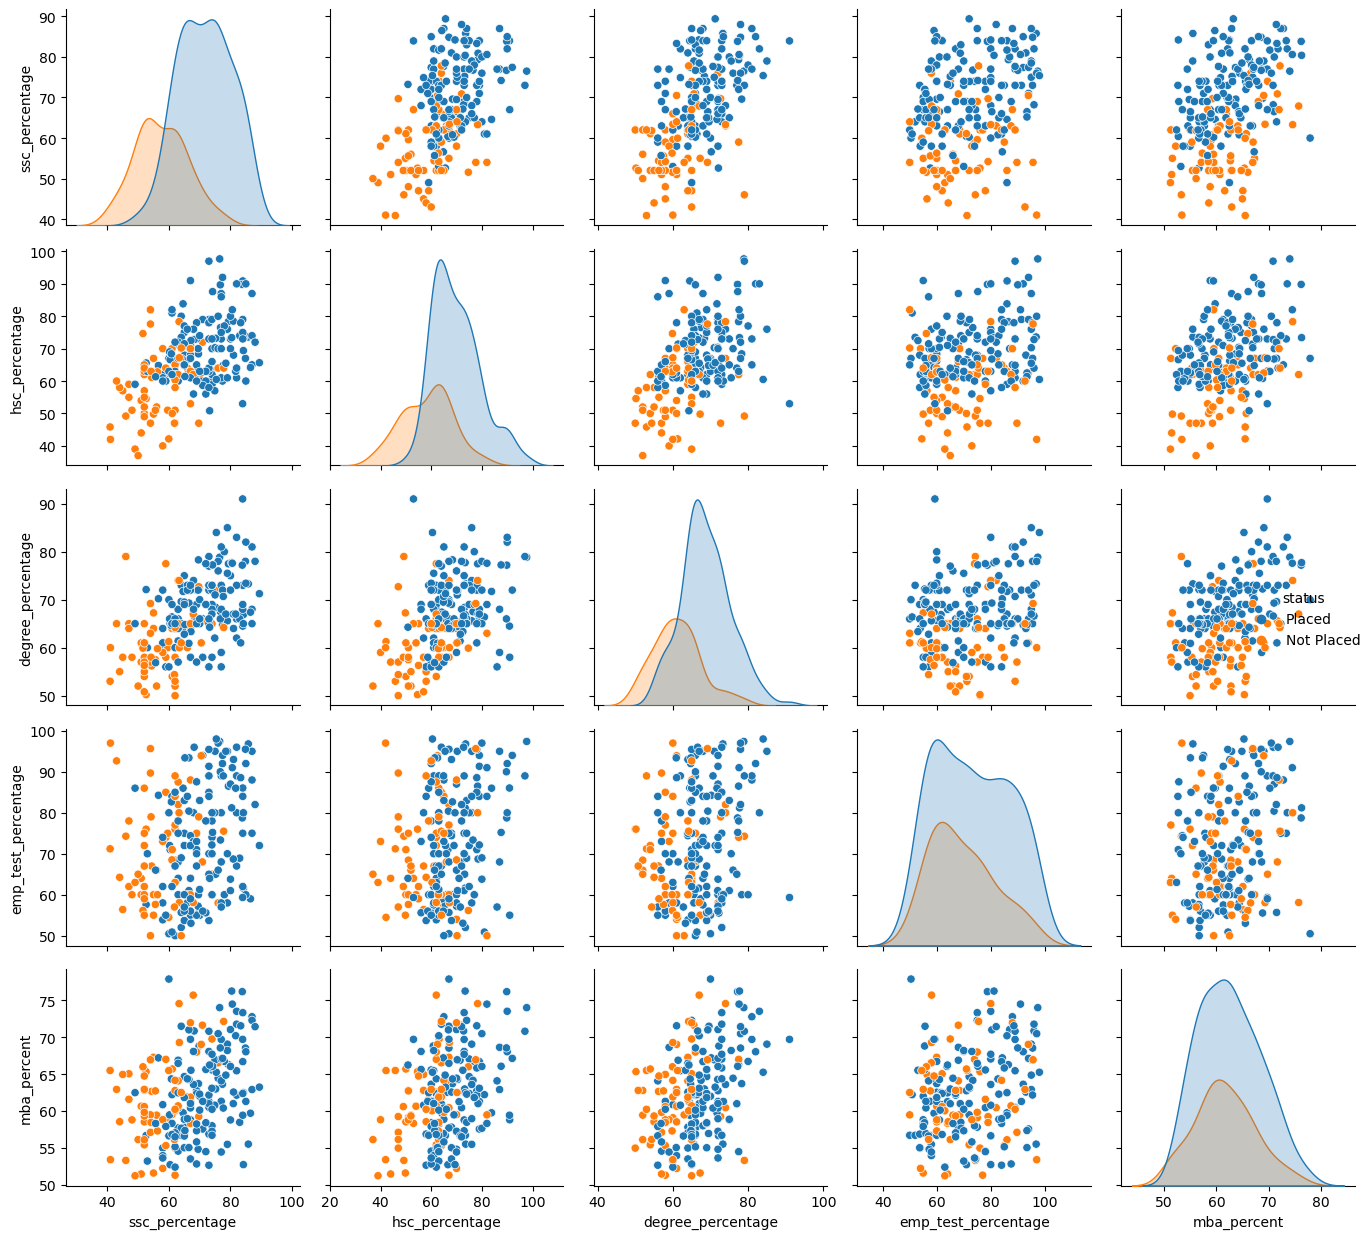

In [12]:
# Correlation between continuous features with Pairplot

pairplot = sns.pairplot(data=data[['ssc_percentage', 'hsc_percentage', 'degree_percentage',
       'emp_test_percentage', 'mba_percent', "status"]], hue="status")
plt.tight_layout()

pairplot.savefig("viz/pairplot.png")

# mba_percent appears to be the least useful continuous feature for predicting Job Placement

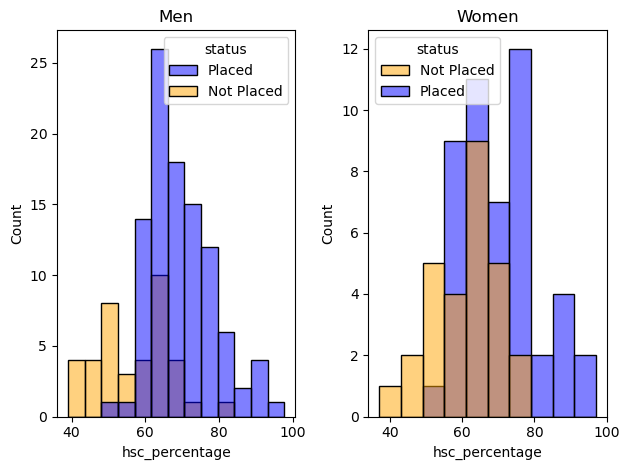

In [23]:
men = data[data["gender"] == "M"]
women = data[data["gender"] == "F"]

palette ={"Placed": "blue", "Not Placed": "orange"}

fig, axes = plt.subplots(1, 2)

sns.histplot(data=men, x="hsc_percentage", hue="status", ax=axes[0], palette=palette)
sns.histplot(data=women, x="hsc_percentage", hue="status", ax=axes[1], palette=palette)
axes[0].title.set_text("Men")
axes[1].title.set_text("Women")

plt.tight_layout()

fig.savefig("viz/histogram.png")

<AxesSubplot:xlabel='undergrad_degree', ylabel='Count'>

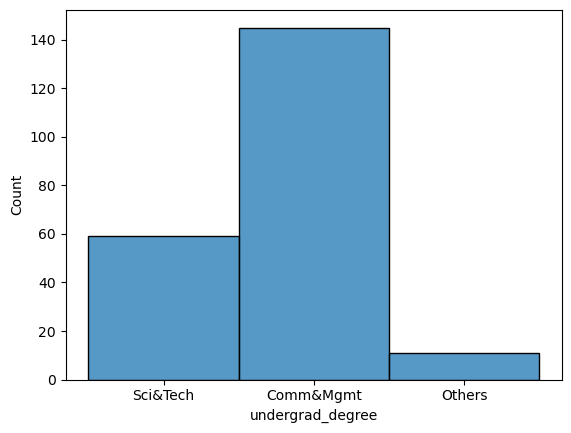

In [29]:
sns.histplot(data=data, x="undergrad_degree")

In [21]:
data.status.value_counts()

Placed        148
Not Placed     67
Name: status, dtype: int64

# Data Transformation

In [22]:
# Encode categorical features
data["gender"] = data["gender"].map({"M": 1, "F": 0})
data["ssc_board"] = data["ssc_board"].map({"Central": 1, "Others": 0})
data["hsc_board"] = data["hsc_board"].map({"Central": 1, "Others": 0})
data["work_experience"] = data["work_experience"].map({"Yes": 1, "No": 0})
data["specialisation"] = data["specialisation"].map({"Mkt&Fin": 1, "Mkt&HR": 0})
data["status"] = data["status"].map({"Placed": 1, "Not Placed": 0})

data = pd.get_dummies(data=data, columns=["hsc_subject", "undergrad_degree"])
data.to_csv("encoded_data.csv", index=False)
data


,gender,ssc_percentage,ssc_board,hsc_percentage,hsc_board,degree_percentage,work_experience,emp_test_percentage,specialisation,mba_percent,status,hsc_subject_Arts,hsc_subject_Commerce,hsc_subject_Science,undergrad_degree_Comm&Mgmt,undergrad_degree_Others,undergrad_degree_Sci&Tech
0,1,67.00,0,91.00,0,58.00,0,55.0,0,58.80,1,0,1,0,0,0,1
1,1,79.33,1,78.33,0,77.48,1,86.5,1,66.28,1,0,0,1,0,0,1
2,1,65.00,1,68.00,1,64.00,0,75.0,1,57.80,1,1,0,0,1,0,0
3,1,56.00,1,52.00,1,52.00,0,66.0,0,59.43,0,0,0,1,0,0,1
4,1,85.80,1,73.60,1,73.30,0,96.8,1,55.50,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,1,80.60,0,82.00,0,77.60,0,91.0,1,74.49,1,0,1,0,1,0,0
211,1,58.00,0,60.00,0,72.00,0,74.0,1,53.62,1,0,0,1,0,0,1
212,1,67.00,0,67.00,0,73.00,1,59.0,1,69.72,1,0,1,0,1,0,0
213,0,74.00,0,66.00,0,58.00,0,70.0,0,60.23,1,0,1,0,1,0,0


In [17]:
from copy import deepcopy

data2 = deepcopy(data)
data2

,gender,ssc_percentage,ssc_board,hsc_percentage,hsc_board,hsc_subject,degree_percentage,undergrad_degree,work_experience,emp_test_percentage,specialisation,mba_percent,status
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed
211,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed
212,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed
213,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed


In [21]:
data2["ssc_percentage"].apply(lambda x: 1 if x > 80 else 0)

0      0
1      0
2      0
3      0
4      1
      ..
210    1
211    0
212    0
213    0
214    0
Name: ssc_percentage, Length: 215, dtype: int64